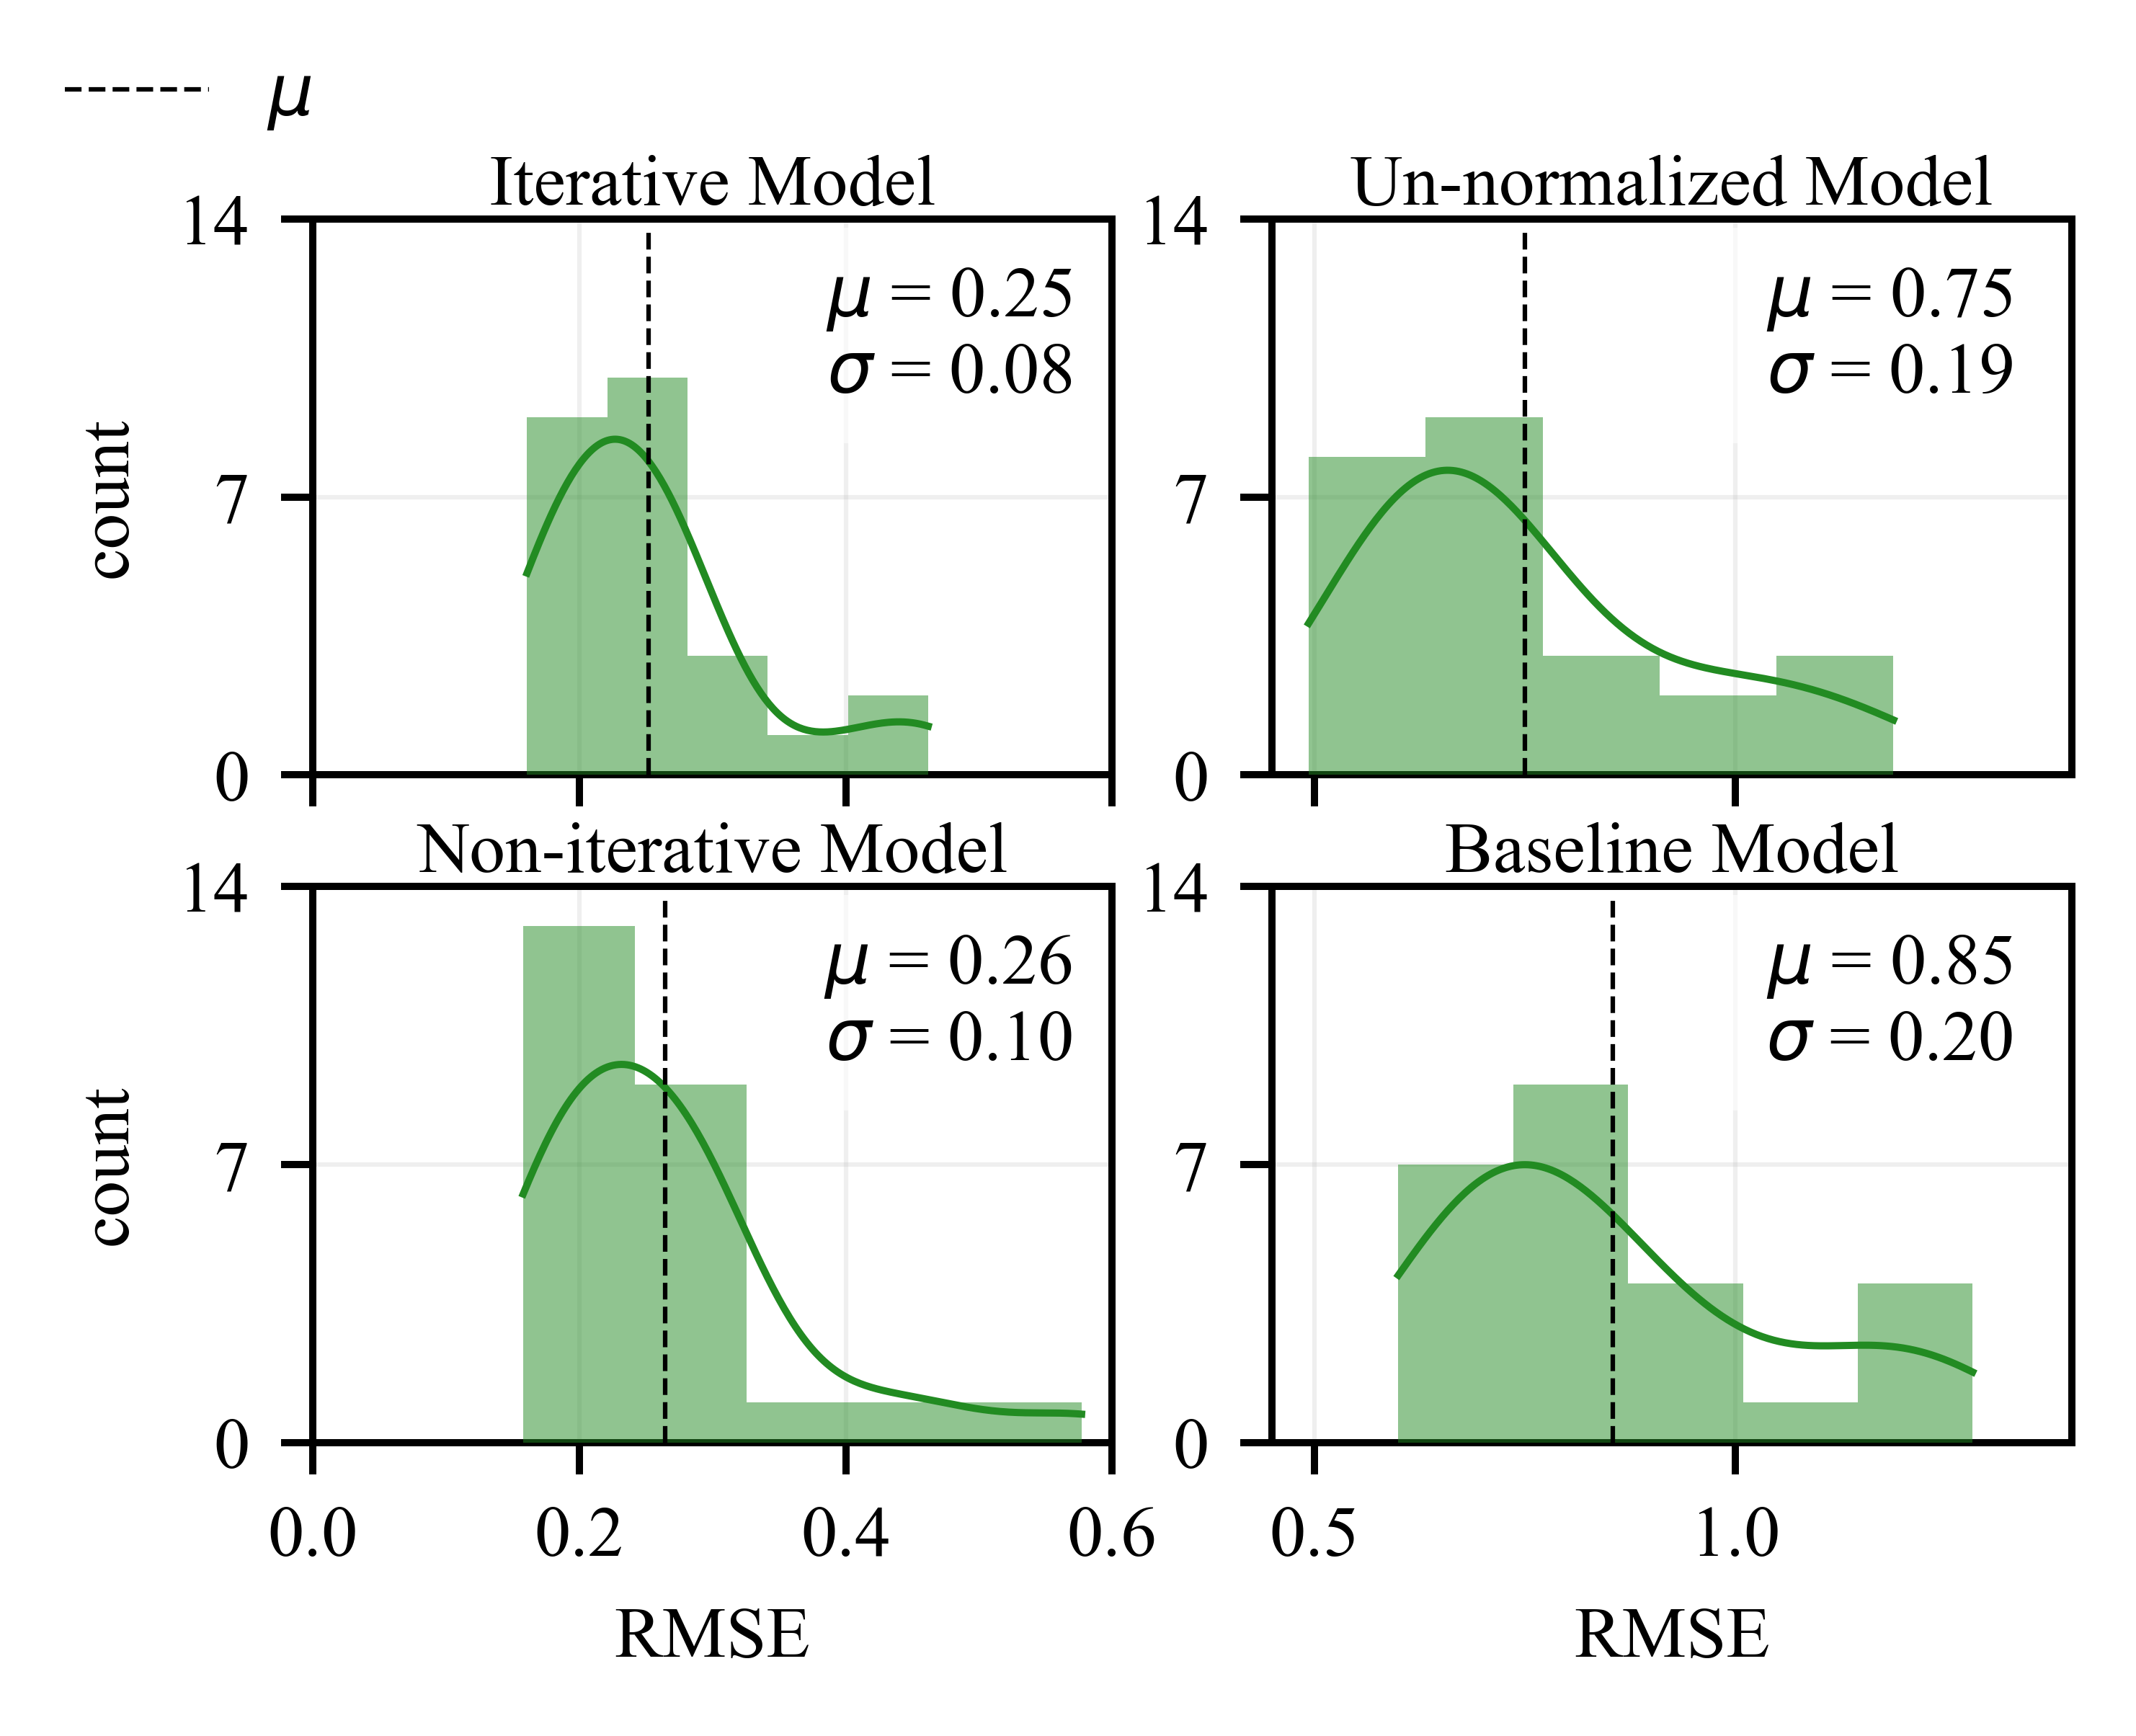

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pickle as pkl
import numpy as np
import os

# Histograming
model_1 = "Iterative Model"
model_2 = "Un-normalized Model"
model_3 = "Non-iterative Model"
model_4 = "Baseline Model"

folder_dir= 'dicts_mc'

mc_file_name_1 = "Exp_0_24_Exact - MANAMAdpStatSynthData_montecarlo.pkl"
mc_file_dir_1 = os.path.join(folder_dir, mc_file_name_1)  
with open(mc_file_dir_1, "rb") as pickle_file:
    mc_masterdict_complete_1 = pkl.load(pickle_file)

mc_file_name_2 = "Exp_0_24_Exact - NonNormalizedConstStatSynthData_montecarlo.pkl"
mc_file_dir_2 = os.path.join(folder_dir, mc_file_name_2)  
with open(mc_file_dir_2, "rb") as pickle_file:
    mc_masterdict_complete_2 = pkl.load(pickle_file)
    
mc_file_name_3 = "Exp_0_24_ExactAdpStatSynthData_montecarlo.pkl" 
mc_file_dir_3 = os.path.join(folder_dir, mc_file_name_3)  
with open(mc_file_dir_3, "rb") as pickle_file:
    mc_masterdict_complete_3 = pkl.load(pickle_file)

train_rmse_1 = []
train_rmse_2 = []
train_rmse_3 = []
train_rmse_4 = []

test_rmse_1 = []
test_rmse_2 = []
test_rmse_3 = []
test_rmse_4 = []

for sample_idx in mc_masterdict_complete_3.keys():
    
    train_rmse_1.append(mc_masterdict_complete_1[sample_idx]['rmse_train_neural'])
    test_rmse_1.append(mc_masterdict_complete_1[sample_idx]['rmse_test_neural'])
    
    train_rmse_2.append(mc_masterdict_complete_2[sample_idx]['rmse_train_neural'])
    test_rmse_2.append(mc_masterdict_complete_2[sample_idx]['rmse_test_neural'])
    
    train_rmse_3.append(mc_masterdict_complete_3[sample_idx]['rmse_train_neural'])
    test_rmse_3.append(mc_masterdict_complete_3[sample_idx]['rmse_test_neural'])
    
    train_rmse_4.append(mc_masterdict_complete_3[sample_idx]['rmse_train_phys'])
    test_rmse_4.append(mc_masterdict_complete_3[sample_idx]['rmse_test_phys'])

train_rmse_data = [np.asarray(train_rmse_1), np.asarray(train_rmse_2), np.asarray(train_rmse_3), np.asarray(train_rmse_4)]
test_rmse_data = [np.asarray(test_rmse_1), np.asarray(test_rmse_2), np.asarray(test_rmse_3), np.asarray(test_rmse_4)]
model_labels = [model_1, model_2, model_3, model_4]

# Create a 2x2 grid of subplots
dpi = 900
fs = 8
lw_rr = 0.4
cw = 3.5
ar = 0.7
pad = 1
rcParams['font.family'] = 'Times New Roman'
rcParams.update({
'font.size': 8,                # General font size
'axes.titlesize': 8,           # Title of axes
'axes.labelsize': 8,           # Labels of axes
'xtick.labelsize': 8,          # x-axis tick labels
'ytick.labelsize': 8,          # y-axis tick labels
'legend.fontsize': 8,          # Legend font size
'figure.titlesize': 8          # Figure title font size
})
color_1 = "#228B22"
# color_1 = "#006400"
color_2 = "#FF4500"
color_3 = "k"
bins = 5
stat = "count"
# stat = "frequency"
# stat = "probability"
# stat = "percent"
# stat = "density"

fig, axes = plt.subplots(2, 2, figsize=(cw,  cw*ar), dpi=dpi)

# sns.histplot(train_rmse_data[0], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[0, 0], zorder=2, color=color_2, edgecolor=None, stat=stat)
sns.histplot(test_rmse_data[0], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[0, 0], zorder=3, color=color_1, edgecolor=None, stat=stat)
# axes[0, 0].axvline(train_rmse_data[0].mean(), color=color_2, linestyle='--', linewidth=1.25*lw_rr, zorder=4, ymin=0, ymax=0.98)
axes[0, 0].axvline(test_rmse_data[0].mean(), color=color_3, linestyle='--', linewidth=1.25*lw_rr, zorder=5, ymin=0, ymax=0.98)
axes[0, 0].set_title(f'{model_labels[0]}', pad=pad)
axes[0, 0].set_ylabel(stat)
axes[0, 0].set_xlabel('')
axes[0, 0].set_xlim(0, 0.6)
axes[0, 0].set_ylim(0, 14)
axes[0, 0].grid(True, alpha=0.2, linewidth=0.5)
text_x = axes[0, 0].get_xlim()[1] * 0.95
text_y = axes[0, 0].get_ylim()[1] * 0.95
# axes[0, 0].text(
#     text_x, text_y,
#     r"$\mu$ = " + f"{train_rmse_data[0].mean():.2f}" + ", " + r"$\sigma$ = " + f"{train_rmse_data[0].std():.2f}",
#     ha='right', va='top', fontsize=8, color=color_2, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
# )
axes[0, 0].text(
    text_x, text_y*(0.965),
    r"$\mu$ = " + f"{test_rmse_data[0].mean():.2f}" + "\n" + r"$\sigma$ = " + f"{test_rmse_data[0].std():.2f}",
    ha='right', va='top', fontsize=8, color=color_3, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)
# axes[0, 0].set_xticks([])
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticks([0, 7, 14])
# sns.histplot(train_rmse_data[1], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[0, 1], zorder=2, color=color_2, edgecolor=None, stat=stat)
sns.histplot(test_rmse_data[1], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[0, 1], zorder=3, color=color_1, edgecolor=None, stat=stat)
# axes[0, 1].axvline(train_rmse_data[1].mean(), color=color_2, linestyle='--', linewidth=1.25*lw_rr, zorder=4, ymin=0, ymax=0.98)
axes[0, 1].axvline(test_rmse_data[1].mean(), color=color_3, linestyle='--', linewidth=1.25*lw_rr, zorder=5, ymin=0, ymax=0.98)
axes[0, 1].set_title(f'{model_labels[1]}', pad=pad)
axes[0, 1].set_ylabel(' ')
axes[0, 1].set_xlabel(' ')
axes[0, 1].set_xlim(0.45, 1.4)
axes[0, 1].set_ylim(0, 14)
axes[0, 1].grid(True, alpha=0.2, linewidth=0.5)
text_x = axes[0, 1].get_xlim()[1] * 0.95
text_y = axes[0, 1].get_ylim()[1] * 0.95
# axes[0, 1].text(
#     text_x, text_y,
#     r"$\mu$ = " + f"{train_rmse_data[1].mean():.2f}" + ", " + r"$\sigma$ = " + f"{train_rmse_data[1].std():.2f}",
#     ha='right', va='top', fontsize=8, color=color_2, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
# )
axes[0, 1].text(
    text_x, text_y*(0.965),
    r"$\mu$ = " + f"{test_rmse_data[1].mean():.2f}" + "\n" + r"$\sigma$ = " + f"{test_rmse_data[1].std():.2f}",
    ha='right', va='top', fontsize=8, color=color_3, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)
# axes[0, 1].set_xticks([])
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticks([0, 7, 14])
# axes[0, 1].set_yticks([])

# sns.histplot(train_rmse_data[2], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[1, 0], zorder=2, color=color_2, edgecolor=None, stat=stat)
sns.histplot(test_rmse_data[2], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[1, 0], zorder=3, color=color_1, edgecolor=None, stat=stat)
# axes[1, 0].axvline(train_rmse_data[2].mean(), color=color_2, linestyle='--', linewidth=1.25*lw_rr, zorder=4, ymin=0, ymax=0.98)
axes[1, 0].axvline(test_rmse_data[2].mean(), color=color_3, linestyle='--', linewidth=1.25*lw_rr, zorder=5, ymin=0, ymax=0.98)
axes[1, 0].set_title(f'{model_labels[2]}', pad=pad)
axes[1, 0].set_xlabel('RMSE')
axes[1, 0].set_ylabel(stat)
axes[1, 0].set_xlim(0, 0.6)
axes[1, 0].set_ylim(0, 14)
axes[1, 0].grid(True, alpha=0.2, linewidth=0.5)
text_x = axes[1, 0].get_xlim()[1] * 0.95
text_y = axes[1, 0].get_ylim()[1] * 0.95
# axes[1, 0].text(
#     text_x, text_y,
#     r"$\mu$ = " + f"{train_rmse_data[2].mean():.2f}" + ", " + r"$\sigma$ = " + f"{train_rmse_data[2].std():.2f}",
#     ha='right', va='top', fontsize=8, color=color_2, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
# )
axes[1, 0].text(
    text_x, text_y*(0.965),
    r"$\mu$ = " + f"{test_rmse_data[2].mean():.2f}" + "\n" + r"$\sigma$ = " + f"{test_rmse_data[2].std():.2f}",
    ha='right', va='top', fontsize=8, color=color_3, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)
axes[1, 0].set_yticks([0, 7, 14])

# sns.histplot(train_rmse_data[3], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[1, 1], label="Train Error", zorder=2, color=color_2, edgecolor=None, stat=stat)
sns.histplot(test_rmse_data[3], kde=True, line_kws = dict(linewidth = 2*lw_rr, linestyle = '-'), bins=bins, ax=axes[1, 1], zorder=3, color=color_1, edgecolor=None, stat=stat)
# axes[1, 1].axvline(train_rmse_data[3].mean(), color=color_2, linestyle='--', linewidth=1.25*lw_rr, label="Mean Train Error", zorder=4, ymin=0, ymax=0.98)
axes[1, 1].axvline(test_rmse_data[3].mean(), color=color_3, linestyle='--', linewidth=1.25*lw_rr, label=r"$\mu$", zorder=5, ymin=0, ymax=0.98)
axes[1, 1].set_title(f'{model_labels[3]}', pad=pad)
axes[1, 1].set_xlabel('RMSE')
axes[1, 1].set_ylabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlim(0.45, 1.4)
axes[1, 1].set_ylim(0, 14)
axes[1, 1].grid(True, alpha=0.2, linewidth=0.5)
text_x = axes[1, 1].get_xlim()[1] * 0.95
text_y = axes[1, 1].get_ylim()[1] * 0.95
# axes[1, 1].text(
#     text_x, text_y,
#     r"$\mu$ = " + f"{train_rmse_data[3].mean():.2f}" + ", " + r"$\sigma$ = " + f"{train_rmse_data[3].std():.2f}",
#     ha='right', va='top', fontsize=8, color=color_2, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
# )
axes[1, 1].text(
    text_x, text_y*(0.965),
    r"$\mu$ = " + f"{test_rmse_data[3].mean():.2f}" + "\n " + r"$\sigma$ = " + f"{test_rmse_data[3].std():.2f}",
    ha='right', va='top', fontsize=8, color=color_3, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
)
axes[1, 1].set_yticks([0, 7, 14])
# axes[1, 1].set_yticks([])

# Adjust layout
fig.legend(loc='upper left', frameon=False)
plt.show()